In [197]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [198]:
df = pd.read_csv('Dataset_cervical_cancer.csv')

In [199]:
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [200]:
df.shape

(858, 36)

In [201]:
df.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

In [202]:
df.dtypes

Age                                    int64
Number of sexual partners             object
First sexual intercourse              object
Num of pregnancies                    object
Smokes                                object
Smokes (years)                        object
Smokes (packs/year)                   object
Hormonal Contraceptives               object
Hormonal Contraceptives (years)       object
IUD                                   object
IUD (years)                           object
STDs                                  object
STDs (number)                         object
STDs:condylomatosis                   object
STDs:cervical condylomatosis          object
STDs:vaginal condylomatosis           object
STDs:vulvo-perineal condylomatosis    object
STDs:syphilis                         object
STDs:pelvic inflammatory disease      object
STDs:genital herpes                   object
STDs:molluscum contagiosum            object
STDs:AIDS                             object
STDs:HIV  

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [204]:
df.describe()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [205]:
df = df.replace('?', np.nan)
df = df.apply(pd.to_numeric)
df.isnull().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [206]:
df = df.drop(['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis'], axis=1)
df.fillna(df.mode().T[0], inplace=True)

In [207]:
df = df.fillna(df.mean())
df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,15.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.00,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,0,0


In [208]:
corr_matrix = df.corr()
corr_matrix

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
Age,1.000000,0.085971,0.365248,0.514977,0.057204,0.218261,0.131861,0.029201,0.298892,0.279429,...,0.040861,-0.001606,0.110340,0.061443,0.101722,0.092635,-0.003967,0.103283,-0.016862,0.055956
Number of sexual partners,0.085971,1.000000,-0.147280,0.082388,0.236858,0.175729,0.174968,0.004027,0.021525,0.032460,...,0.014360,0.053056,0.023699,0.016669,0.028646,0.024597,-0.039098,-0.007230,0.024067,-0.000408
First sexual intercourse,0.365248,-0.147280,1.000000,-0.046099,-0.123017,-0.058620,-0.057013,-0.009563,0.031976,-0.008826,...,0.034938,-0.011617,0.067996,-0.031960,0.044727,0.036664,-0.015311,0.005275,-0.009594,0.008771
Num of pregnancies,0.514977,0.082388,-0.046099,1.000000,0.077363,0.172084,0.092214,0.116944,0.221456,0.198134,...,-0.023343,0.039195,0.042765,-0.037752,0.054111,-0.003034,0.033987,0.077526,-0.020131,0.027959
Smokes,0.057204,0.236858,-0.123017,0.077363,1.000000,0.723572,0.493843,0.004036,0.040917,-0.055115,...,0.049193,0.090725,-0.013470,-0.042119,0.009737,-0.069396,0.033333,0.052028,-0.004639,0.028724
Smokes (years),0.218261,0.175729,-0.058620,0.172084,0.723572,1.000000,0.724320,-0.013888,0.052436,0.027492,...,0.051201,0.078303,0.052859,-0.030476,0.055398,-0.050213,0.070352,0.093479,-0.007275,0.061204
Smokes (packs/year),0.131861,0.174968,-0.057013,0.092214,0.493843,0.724320,1.000000,0.001713,0.043803,0.008226,...,-0.008015,0.029912,0.107229,-0.020800,0.109118,-0.034270,0.026086,0.017200,0.004250,0.024487
Hormonal Contraceptives,0.029201,0.004027,-0.009563,0.116944,0.004036,-0.013888,0.001713,1.000000,0.370696,0.000188,...,0.032666,-0.062199,0.011278,-0.004397,0.028808,-0.007245,0.012360,-0.034002,-0.025116,-0.018015
Hormonal Contraceptives (years),0.298892,0.021525,0.031976,0.221456,0.040917,0.052436,0.043803,0.370696,1.000000,0.115456,...,0.054142,-0.025662,0.064993,0.003972,0.066509,-0.008054,0.054264,0.101250,0.084429,0.097937
IUD,0.279429,0.032460,-0.008826,0.198134,-0.055115,0.027492,0.008226,0.000188,0.115456,1.000000,...,-0.015819,0.035791,0.117166,0.043708,0.062142,0.135778,0.052108,0.096089,0.013292,0.059231


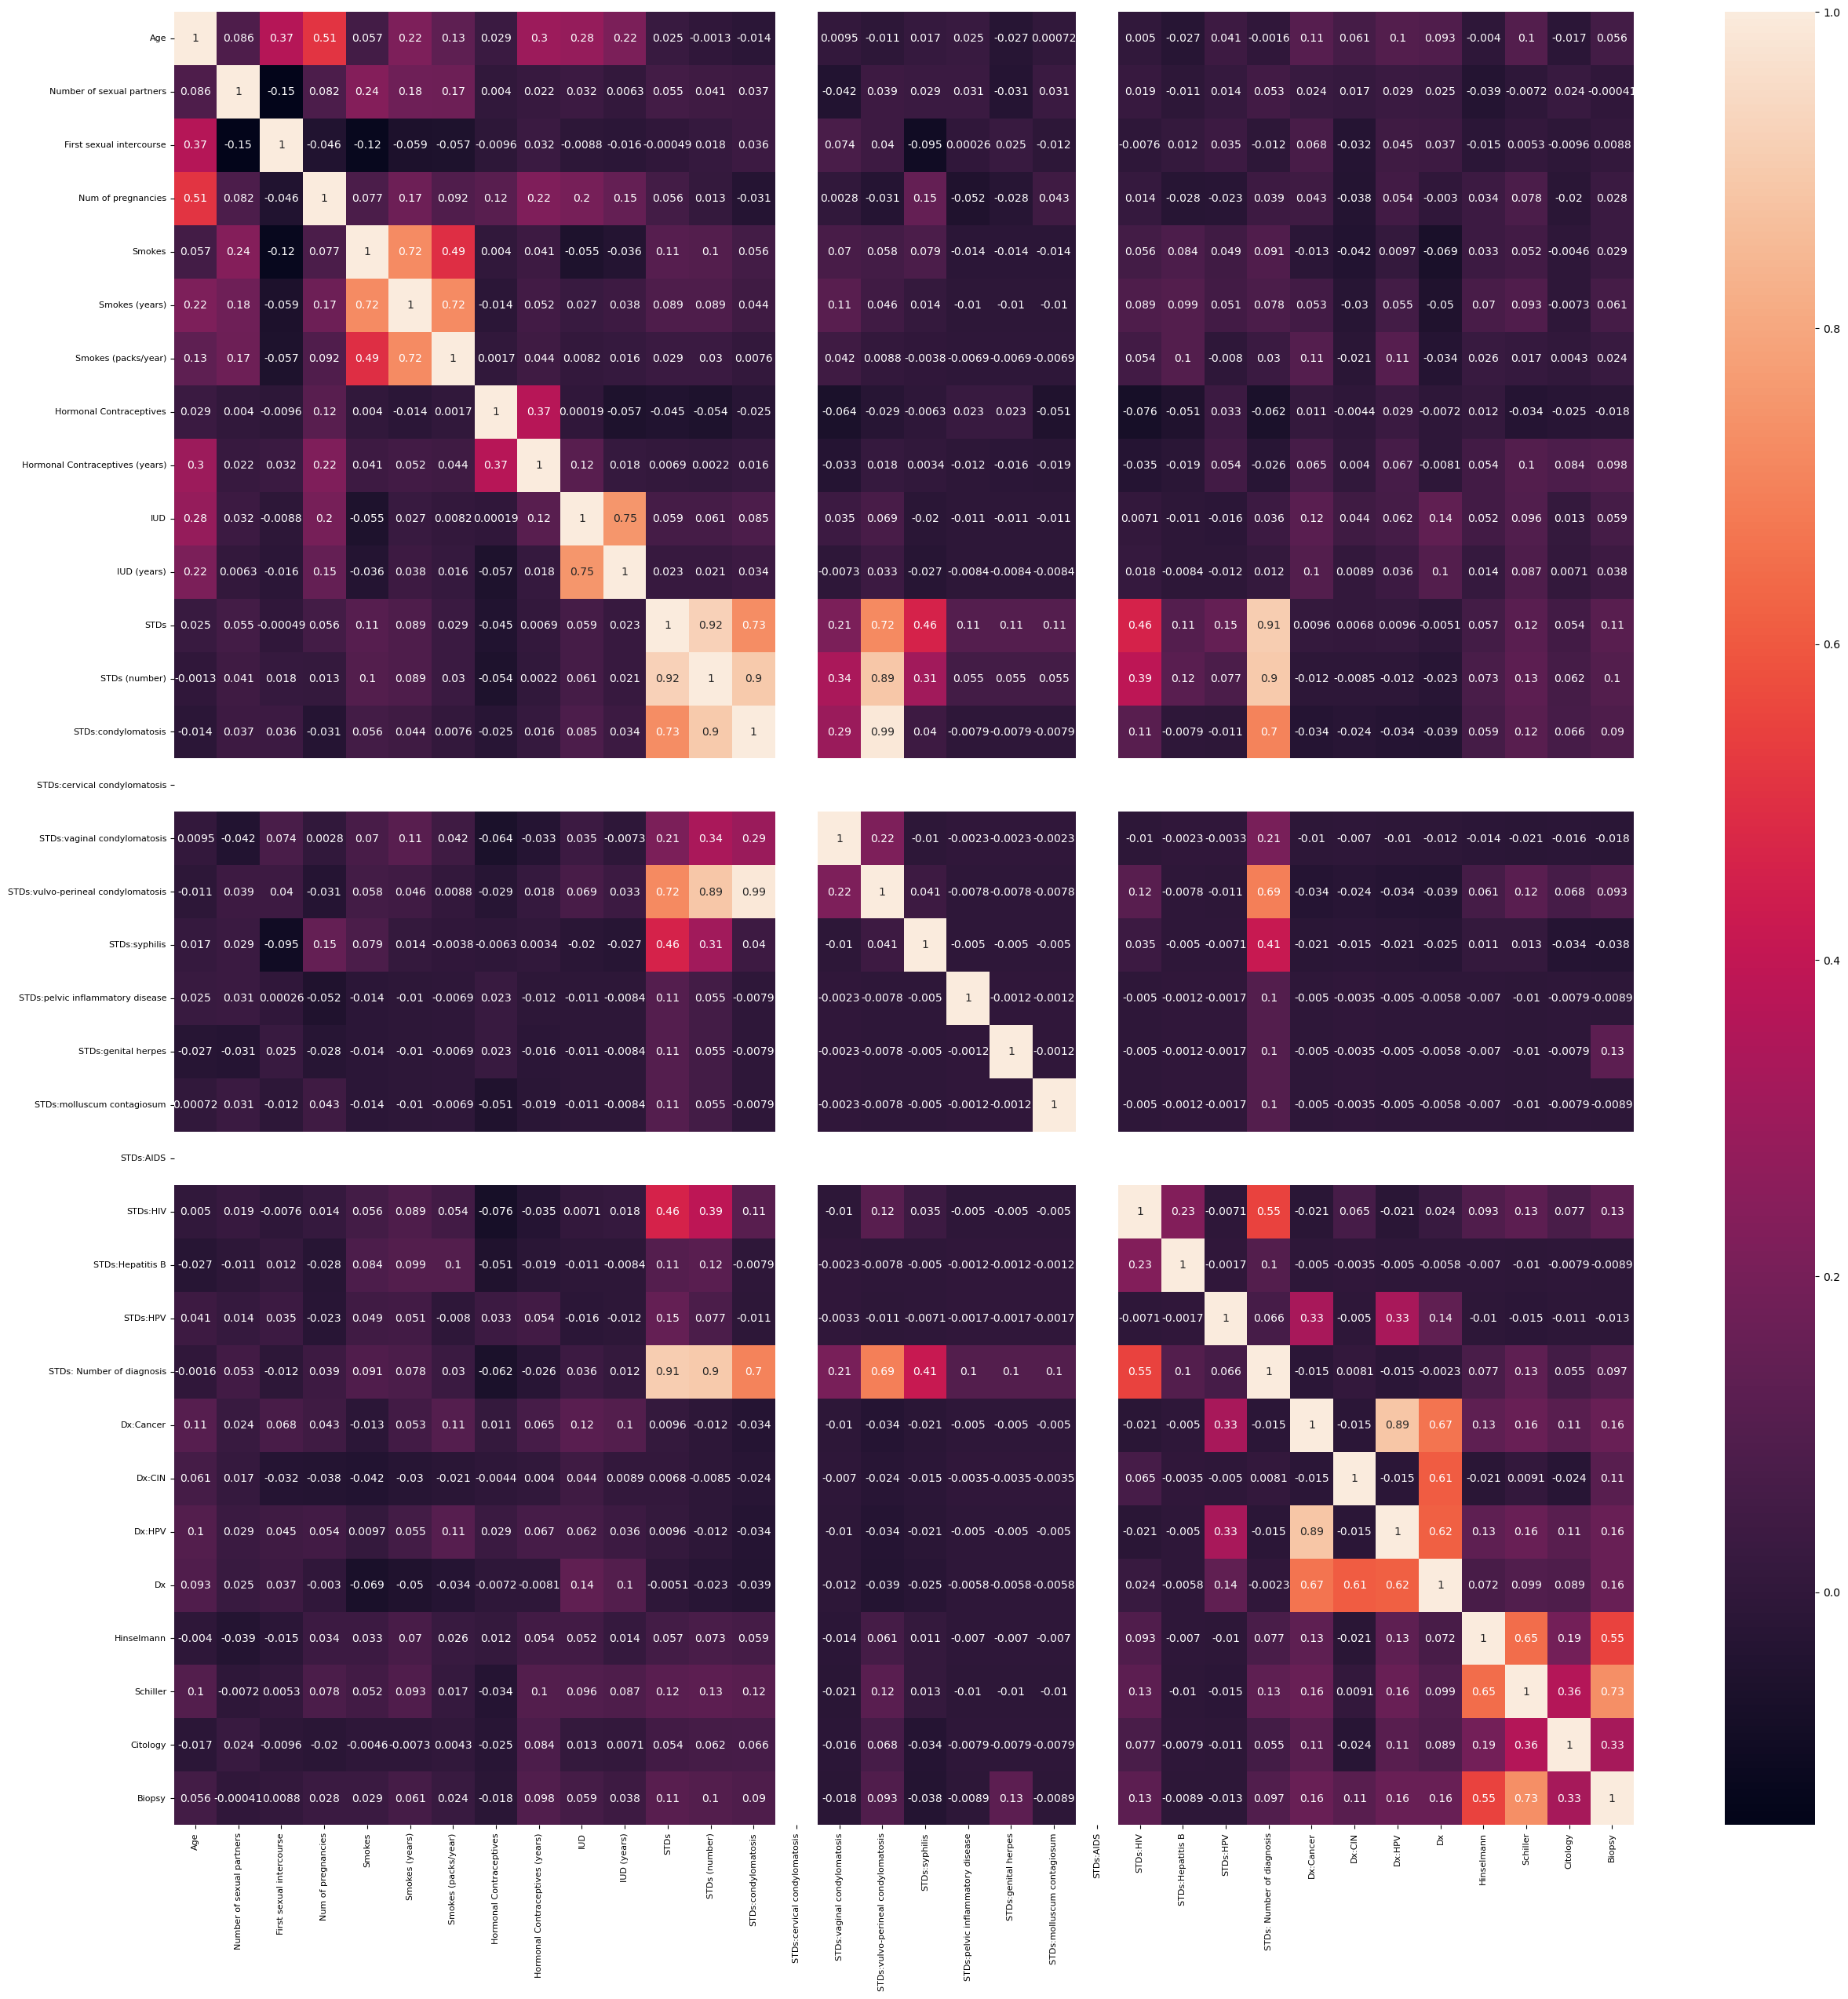

In [209]:
plt.figure(figsize = (30,30))
sns.heatmap(corr_matrix, annot=True)
plt.xticks(rotation=90)
plt.yticks(rotation=360)
plt.tick_params(labelsize=8)
plt.show()

In [210]:
# Inspecting the cervical condylomatosis column
df['STDs:cervical condylomatosis'][df['STDs:cervical condylomatosis'] != 0]

# Inspecting the cervical condylomatosis column
df['STDs:cervical condylomatosis'][df['STDs:cervical condylomatosis'] != 0]

# Inspecting the column STDs: AIDS
df['STDs:AIDS'][df['STDs:AIDS'] != 0]

# Inspecting the column STDs: genital herpes
df['STDs:genital herpes'][df['STDs:genital herpes'] != 0]
print(f"The column 'STDs: genital herpes' has only {len(df['STDs:genital herpes'][df['STDs:genital herpes'] != 0])} non-zero entries.")

# Inspecting the column STDs: pelvic inflammatory disease
df['STDs:pelvic inflammatory disease'][df['STDs:pelvic inflammatory disease'] != 0]
print(f"The column 'STDs: pelvic inflammatory disease' has only {len(df['STDs:pelvic inflammatory disease'][df['STDs:pelvic inflammatory disease'] != 0])} non-zero entries.")


The column 'STDs: genital herpes' has only 1 non-zero entries.
The column 'STDs: pelvic inflammatory disease' has only 1 non-zero entries.


In [211]:
# Deleting unnecessary columns
df.drop(['STDs:cervical condylomatosis', 'STDs:AIDS', 'STDs:genital herpes', 'STDs:pelvic inflammatory disease'], axis=1, inplace=True)


In [212]:
df['Biopsy'].value_counts()
# Inspecting the Biopsy column for class imbalance
df.groupby('Biopsy').count()


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
Biopsy,,,,,,,,,,,,,,,,,,,,,
0,803,803,803,803,803,803,803,803,803,803,...,803,803,803,803,803,803,803,803,803,803
1,55,55,55,55,55,55,55,55,55,55,...,55,55,55,55,55,55,55,55,55,55


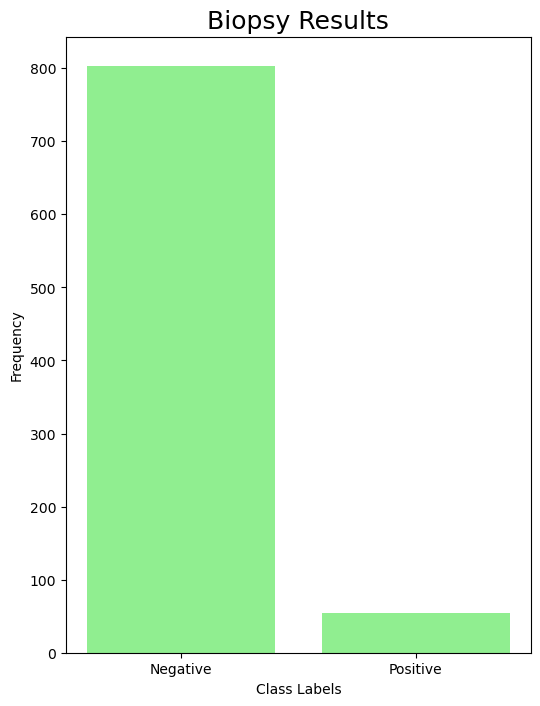

In [213]:
# Plotting the biopsy results

# Define the df
labels = ['Negative', 'Positive']
frequency = [803, 55]
colors = ['lightgreen']

# Create the plot
plt.figure(figsize=(6, 8))
plt.bar(labels, frequency, color=colors)
plt.title('Biopsy Results', fontsize=18)
plt.xlabel('Class Labels')
plt.ylabel('Frequency')
plt.show()


In [214]:
df.shape
# various number of sexual partners in the given dfset
df['Number of sexual partners'].value_counts()

Number of sexual partners
2.0     298
3.0     208
1.0     206
4.0      78
5.0      44
6.0       9
7.0       7
8.0       4
15.0      1
10.0      1
28.0      1
9.0       1
Name: count, dtype: int64

In [215]:
from sklearn.model_selection import train_test_split
train_cervical, test_cervical = train_test_split(df, test_size=0.2, stratify=df.Biopsy, random_state=9)

df.to_csv('clean_cervical.csv', index=False)
train_cervical.to_csv('train_cervical.csv', index=False)
test_cervical.to_csv('test_cervical.csv', index=False)


In [216]:
cervical = pd.read_csv('clean_cervical.csv')
train_cervical = pd.read_csv('train_cervical.csv')
test_cervical = pd.read_csv('test_cervical.csv')

In [217]:
from sklearn import preprocessing
import numpy as np
import pandas as pd
from sklearn import preprocessing, neighbors, svm
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")

import scikitplot as skplt
from sklearn.decomposition import PCA

In [218]:
df = df.astype('float64')
# Input : features
x = df.drop('Biopsy', axis=1)

# Output : prediction
y = df['Biopsy']

SS = StandardScaler()
df_scaled = pd.DataFrame(SS.fit_transform(x), columns = x.columns) # as scaling mandotory for KNN model

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.25, random_state = 1)
x_train1,x_test1,y_train,y_test = train_test_split(df_scaled,y, test_size = 0.25, random_state = 1) # for knn

l= []  #List to store the various model metrics

In [291]:
from sklearn.svm import SVC  
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import pandas as pd

# Fit models
LR_model = LogisticRegression(random_state=1).fit(x_train, y_train)
DT_model = DecisionTreeClassifier().fit(x_train, y_train)
RF_model = RandomForestClassifier().fit(x_train, y_train)
SVM_model = SVC(random_state=1, probability=True).fit(x_train, y_train)  
knn_model = KNeighborsClassifier().fit(x_train1, y_train)

# Prepare the models list
models = []
models.append(('SVM', SVM_model))  
models.append(('DT', DT_model))
models.append(('RF', RF_model))
models.append(('LR', LR_model))
models.append(('KNN', knn_model))

results_old = []

# Evaluate each model
for name, model in models:
    res = {}
    res['model'] = name
    if name == "KNN":
        ypred = model.predict(x_test1)
        res['Train_Score'] = model.score(x_train1, y_train)
    else:
        ypred = model.predict(x_test)
        res['Train_Score'] = model.score(x_train, y_train)
        
    # Calculate various metrics
    res['Test_accuracy'] = metrics.accuracy_score(y_test, ypred)
    res['f1score'] = metrics.f1_score(y_test, ypred)
    res['recall'] = metrics.recall_score(y_test, ypred)
    res['precision'] = metrics.precision_score(y_test, ypred)
    res['roc_auc'] = metrics.roc_auc_score(y_test, ypred)

    results_old.append(res)

# Convert results to DataFrame
pd.DataFrame(results_old)
# print(results_df)


,model,Train_Score,Test_accuracy,f1score,recall,precision,roc_auc
0,SVM,0.939347,0.925581,0.000000,0.0000,0.000000,0.500000
1,DT,1.000000,0.948837,0.645161,0.6250,0.666667,0.799937
2,RF,1.000000,0.958140,0.709677,0.6875,0.733333,0.833700
3,LR,0.964230,0.962791,0.733333,0.6875,0.785714,0.836212
4,KNN,0.951788,0.934884,0.363636,0.2500,0.666667,0.619975


In [292]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


pipe = Pipeline([
    ('classifier', DecisionTreeClassifier())  
])


param_grid = [
    {'classifier': [LogisticRegression()],
     'classifier__penalty': ['l1', 'l2'],
     'classifier__C': np.logspace(-4, 4, 20),
     'classifier__solver': ['liblinear']},
    
    {'classifier': [RandomForestClassifier()],
     'classifier__n_estimators': list(range(10, 101, 10)),
     'classifier__max_features': list(range(6, 32, 5))},
    
    {'classifier': [DecisionTreeClassifier()],
     'classifier__criterion': ['gini', 'entropy'],
     'classifier__splitter': ['best', 'random'],
     'classifier__max_depth': [None, 3, 4, 5, 6, 7, 8, 9, 10],
     'classifier__min_samples_split': [2, 5, 10],
     'classifier__min_samples_leaf': [1, 2, 5, 10],
     'classifier__max_features': ['auto', 'sqrt', 'log2']}
]

clf = GridSearchCV(pipe, param_grid=param_grid, cv=5, verbose=True, n_jobs=-1)


best_clf = clf.fit(x_train, y_train)

best_estimator = best_clf.best_estimator_
best_params = best_clf.best_params_

print("Best Estimator:", best_estimator)
print("Best Parameters:", best_params)


Fitting 5 folds for each of 1296 candidates, totalling 6480 fits
Best Estimator: Pipeline(steps=[('classifier',
                 DecisionTreeClassifier(criterion='entropy',
                                        max_features='sqrt',
                                        min_samples_leaf=10,
                                        min_samples_split=5,
                                        splitter='random'))])
Best Parameters: {'classifier': DecisionTreeClassifier(), 'classifier__criterion': 'entropy', 'classifier__max_depth': None, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 10, 'classifier__min_samples_split': 5, 'classifier__splitter': 'random'}


<!-- import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create the pipeline
pipe = Pipeline([
    ('classifier', DecisionTreeClassifier())  # Start with DecisionTreeClassifier
])

# Create param grid for DecisionTreeClassifier
param_grid = [
    {'classifier': [LogisticRegression()],
     'classifier__penalty': ['l1', 'l2'],
     'classifier__C': np.logspace(-4, 4, 20),
     'classifier__solver': ['liblinear']},
    
    {'classifier': [RandomForestClassifier()],
     'classifier__n_estimators': list(range(10, 101, 10)),
     'classifier__max_features': list(range(6, 32, 5))},
    
    {'classifier': [DecisionTreeClassifier()],
     'classifier__criterion': ['gini', 'entropy'],
     'classifier__splitter': ['best', 'random'],
     'classifier__max_depth': [None, 3, 4, 5, 6, 7, 8, 9, 10],
     'classifier__min_samples_split': [2, 5, 10],
     'classifier__min_samples_leaf': [1, 2, 5, 10],
     'classifier__max_features': ['auto', 'sqrt', 'log2']}
]

# Create grid search object
clf = GridSearchCV(pipe, param_grid=param_grid, cv=5, verbose=True, n_jobs=-1)

# Fit on data
best_clf = clf.fit(x_train, y_train)

# Retrieve the best classifier and parameters
best_estimator = best_clf.best_estimator_
best_params = best_clf.best_params_

print("Best Estimator:", best_estimator)
print("Best Parameters:", best_params) -->


In [249]:
print("Best: %f using %s" % (best_clf.best_score_, best_clf.best_params_))

means = best_clf.cv_results_['mean_test_score']
stds = best_clf.cv_results_['std_test_score']
params = best_clf.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.964244 using {'classifier': DecisionTreeClassifier(), 'classifier__criterion': 'entropy', 'classifier__max_depth': 8, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 10, 'classifier__min_samples_split': 10, 'classifier__splitter': 'best'}
0.939353 (0.002986) with: {'classifier': LogisticRegression(), 'classifier__C': 0.0001, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
0.939353 (0.002986) with: {'classifier': LogisticRegression(), 'classifier__C': 0.0001, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
0.939353 (0.002986) with: {'classifier': LogisticRegression(), 'classifier__C': 0.00026366508987303583, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
0.939353 (0.002986) with: {'classifier': LogisticRegression(), 'classifier__C': 0.00026366508987303583, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
0.939353 (0.002986) with: {'classifier': LogisticRegression(), 'classifier__C': 0.00069519279

In [250]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
LR = LogisticRegression()

grid = GridSearchCV(LR, grid, cv=10)
best_parameter_search = grid.fit(x_train,y_train)
best_parameter_search.best_params_

{'C': 1000.0, 'penalty': 'l2'}

In [251]:
# Reduce the parameter grid for faster execution
parameters = {
    'C': [0.1, 1, 10],  # Fewer values
    'kernel': ['linear', 'rbf'],  # Focus on most common kernels
    'gamma': ['scale']  # Use default 'scale' for simplicity
}

# Instantiate the SVC model
SVC_model = SVC()

# Perform grid search with cross-validation
grid = GridSearchCV(SVC_model, parameters, cv=5)  # Reduced to 5-fold cross-validation
best_parameter_search = grid.fit(x_train, y_train)

# Display the best parameters found by GridSearchCV
best_parameter_search.best_params_


{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}

In [305]:
LR_model = LogisticRegression(random_state=1, C=1.0, penalty='l2').fit(x_train, y_train)
DT_model = DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features='sqrt', random_state=123).fit(x_train, y_train)
RF_model = RandomForestClassifier(n_estimators=90, max_features=21, criterion='gini').fit(x_train, y_train)
SVM_model = SVC(C=1.0, kernel='rbf', gamma='scale', random_state=1,probability=True).fit(x_train, y_train)
knn_model = KNeighborsClassifier(n_neighbors=27).fit(x_train1, y_train)

models = []
models.append(('SVM', SVM_model)) 
models.append(('DT', DT_model))
models.append(('RF', RF_model))
models.append(('LR', LR_model))
models.append(('KNN', knn_model))
results = []

for name, model in models:
    res = {}
    res['model'] = name
    if name == "KNN":
        ypred = model.predict(x_test1)
        res['Train_Score'] = model.score(x_train1, y_train)
        res['Test_accuracy'] = metrics.accuracy_score(y_test, ypred)
        res['f1score'] = metrics.f1_score(y_test, ypred)
        res['recall'] = metrics.recall_score(y_test, ypred)
        res['precision'] = metrics.precision_score(y_test, ypred)
        res['roc_auc'] = metrics.roc_auc_score(y_test, ypred)
    else:
        ypred = model.predict(x_test)
        res['Train_Score'] = model.score(x_train, y_train)
        res['Test_accuracy'] = metrics.accuracy_score(y_test, ypred)
        res['f1score'] = metrics.f1_score(y_test, ypred)
        res['recall'] = metrics.recall_score(y_test, ypred)
        res['precision'] = metrics.precision_score(y_test, ypred)
        res['roc_auc'] = metrics.roc_auc_score(y_test, ypred)
    results.append(res)

pd.DataFrame(results)


,model,Train_Score,Test_accuracy,f1score,recall,precision,roc_auc
0,SVM,0.939347,0.925581,0.000000,0.0000,0.000000,0.500000
1,DT,0.953344,0.962791,0.777778,0.8750,0.700000,0.922425
2,RF,1.000000,0.958140,0.727273,0.7500,0.705882,0.862437
3,LR,0.964230,0.962791,0.733333,0.6875,0.785714,0.836212
4,KNN,0.939347,0.925581,0.000000,0.0000,0.000000,0.500000


In [263]:
results_df = pd.DataFrame(results)

# Find the best model based on Test Accuracy
best_model_name = results_df.loc[results_df['Test_accuracy'].idxmax(), 'model']
best_model_accuracy = results_df.loc[results_df['Test_accuracy'].idxmax(), 'Test_accuracy']

# Print the best model name and accuracy
print("Best Model:", best_model_name)
print("Best Model Test Accuracy:", best_model_accuracy)

Best Model: DT
Best Model Test Accuracy: 0.9627906976744186


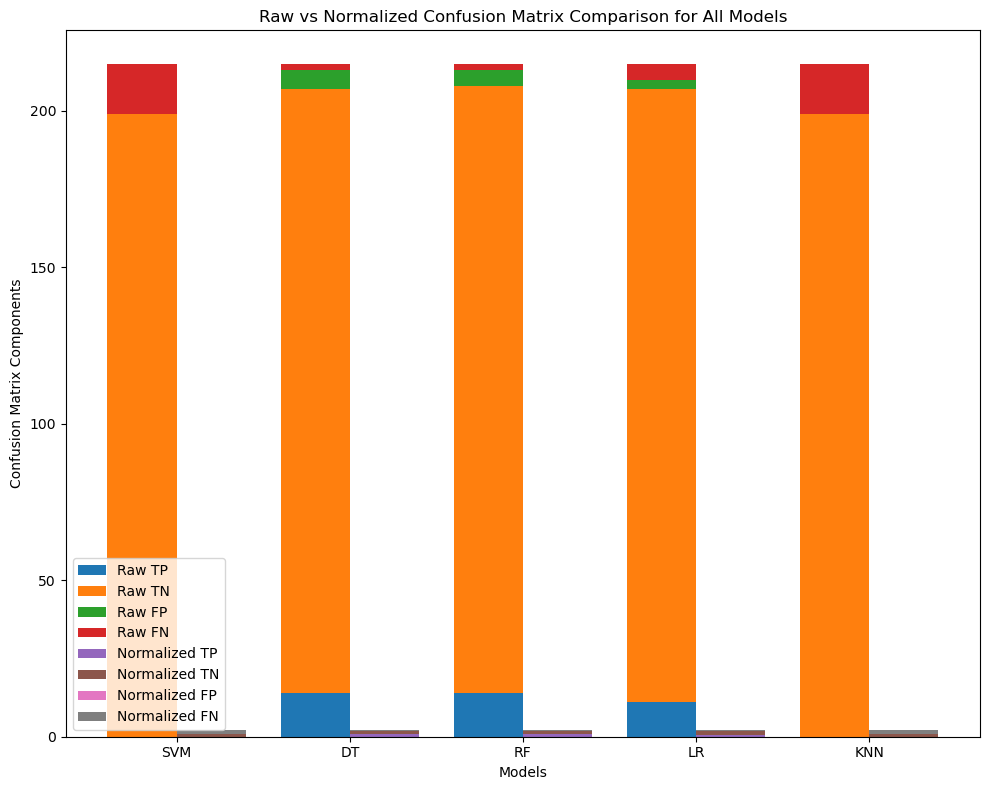

In [227]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

metrics_data = {
    'Model': [],
    'Raw_TP': [], 'Raw_TN': [], 'Raw_FP': [], 'Raw_FN': [],
    'Normalized_TP': [], 'Normalized_TN': [], 'Normalized_FP': [], 'Normalized_FN': []
}

# Loop through the models
for name, model in models:
    if name == "KNN":
        Y_test_pred = model.predict(x_test1)
    else:
        Y_test_pred = model.predict(x_test)

    # Compute raw confusion matrix
    cm_raw = confusion_matrix(y_test, Y_test_pred)
    tn, fp, fn, tp = cm_raw.ravel()

    # Compute normalized confusion matrix
    cm_normalized = confusion_matrix(y_test, Y_test_pred, normalize='true')
    tn_norm, fp_norm, fn_norm, tp_norm = cm_normalized.ravel()

    # Append metrics to the dictionary
    metrics_data['Model'].append(name)
    metrics_data['Raw_TP'].append(tp)
    metrics_data['Raw_TN'].append(tn)
    metrics_data['Raw_FP'].append(fp)
    metrics_data['Raw_FN'].append(fn)
    metrics_data['Normalized_TP'].append(tp_norm)
    metrics_data['Normalized_TN'].append(tn_norm)
    metrics_data['Normalized_FP'].append(fp_norm)
    metrics_data['Normalized_FN'].append(fn_norm)

# Convert metrics_data to a numpy array for easier plotting
raw_metrics = np.array([metrics_data['Raw_TP'], metrics_data['Raw_TN'], metrics_data['Raw_FP'], metrics_data['Raw_FN']])
normalized_metrics = np.array([metrics_data['Normalized_TP'], metrics_data['Normalized_TN'], metrics_data['Normalized_FP'], metrics_data['Normalized_FN']])

# Stacked Bar Plot: Raw vs Normalized
fig, ax = plt.subplots(figsize=(10, 8))
bar_width = 0.4
index = np.arange(len(models))

# Plot Raw Confusion Matrix metrics
p1 = ax.bar(index, raw_metrics[0], bar_width, label='Raw TP')
p2 = ax.bar(index, raw_metrics[1], bar_width, bottom=raw_metrics[0], label='Raw TN')
p3 = ax.bar(index, raw_metrics[2], bar_width, bottom=raw_metrics[0] + raw_metrics[1], label='Raw FP')
p4 = ax.bar(index, raw_metrics[3], bar_width, bottom=raw_metrics[0] + raw_metrics[1] + raw_metrics[2], label='Raw FN')

# Plot Normalized Confusion Matrix metrics
p5 = ax.bar(index + bar_width, normalized_metrics[0], bar_width, label='Normalized TP')
p6 = ax.bar(index + bar_width, normalized_metrics[1], bar_width, bottom=normalized_metrics[0], label='Normalized TN')
p7 = ax.bar(index + bar_width, normalized_metrics[2], bar_width, bottom=normalized_metrics[0] + normalized_metrics[1], label='Normalized FP')
p8 = ax.bar(index + bar_width, normalized_metrics[3], bar_width, bottom=normalized_metrics[0] + normalized_metrics[1] + normalized_metrics[2], label='Normalized FN')

# Labels, title, and formatting
ax.set_xlabel('Models')
ax.set_ylabel('Confusion Matrix Components')
ax.set_title('Raw vs Normalized Confusion Matrix Comparison for All Models')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(metrics_data['Model'])
ax.legend()

# Show plot
plt.tight_layout()
plt.show()


In [228]:
res1 = pd.DataFrame(results_old)
print(res1.head())

  model  Train_Score  Test_accuracy   f1score  recall  precision   roc_auc
0   SVM     0.939347       0.925581  0.000000  0.0000   0.000000  0.500000
1    DT     1.000000       0.944186  0.647059  0.6875   0.611111  0.826162
2    RF     1.000000       0.962791  0.750000  0.7500   0.750000  0.864950
3    LR     0.964230       0.962791  0.733333  0.6875   0.785714  0.836212
4   KNN     0.951788       0.934884  0.363636  0.2500   0.666667  0.619975


In [270]:
res2 = pd.DataFrame(results)
print(res2.head())

  model  Train_Score  Test_accuracy   f1score  recall  precision   roc_auc
0   SVM     0.939347       0.925581  0.000000  0.0000   0.000000  0.500000
1    DT     0.953344       0.962791  0.777778  0.8750   0.700000  0.922425
2    RF     1.000000       0.958140  0.727273  0.7500   0.705882  0.862437
3    LR     0.964230       0.962791  0.733333  0.6875   0.785714  0.836212
4   KNN     0.939347       0.925581  0.000000  0.0000   0.000000  0.500000


In [269]:
import pandas as pd


res2 = pd.DataFrame(results)  

# Export the DataFrame to an Excel file
res2.to_csv("C://Users//priya//Desktop//PROJECTS//CERVICAL CANCER PREDICTION//output.csv", index=False)

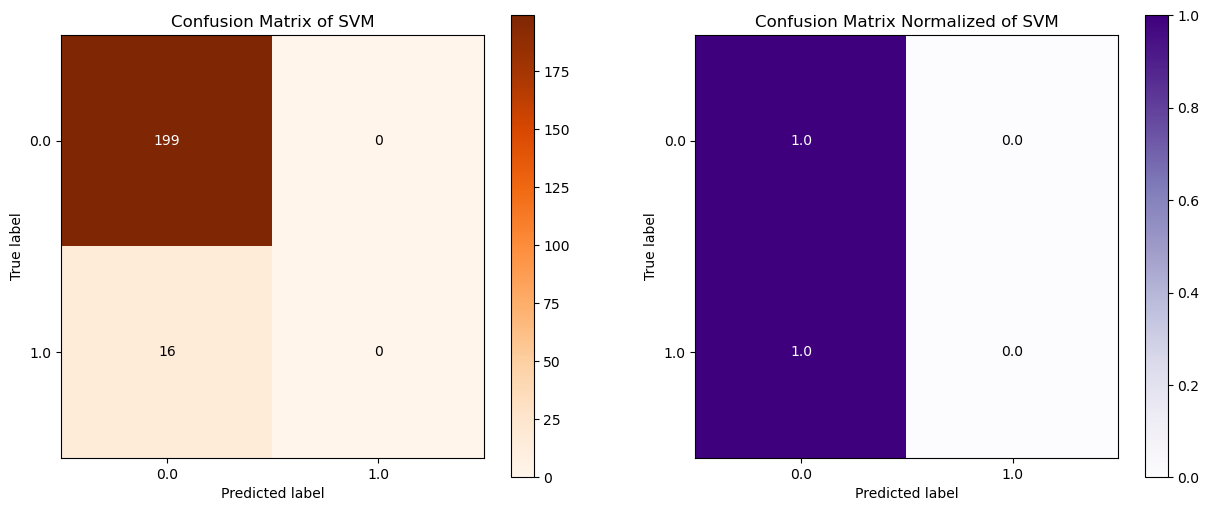

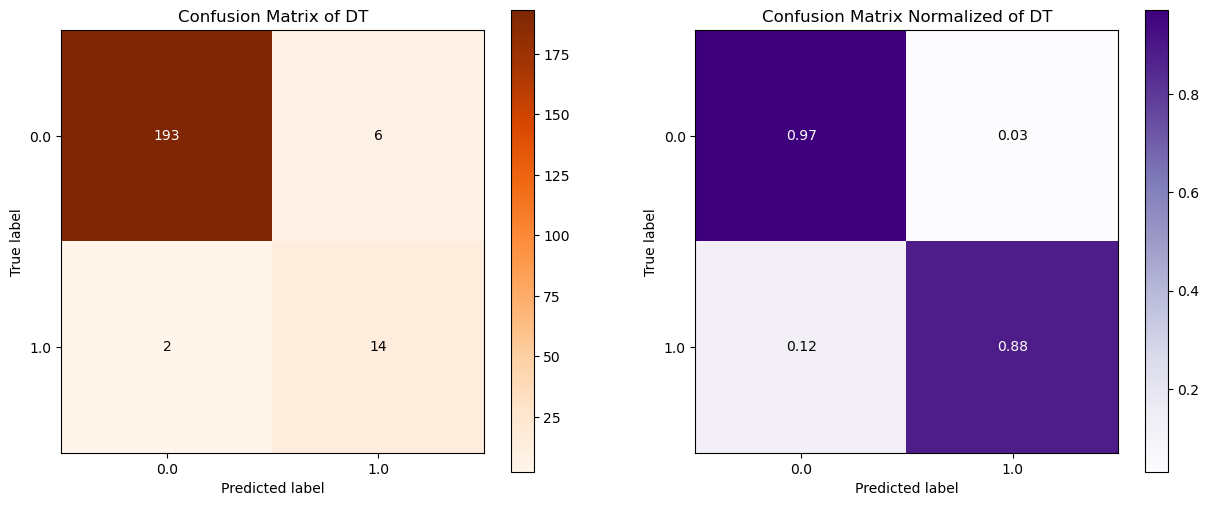

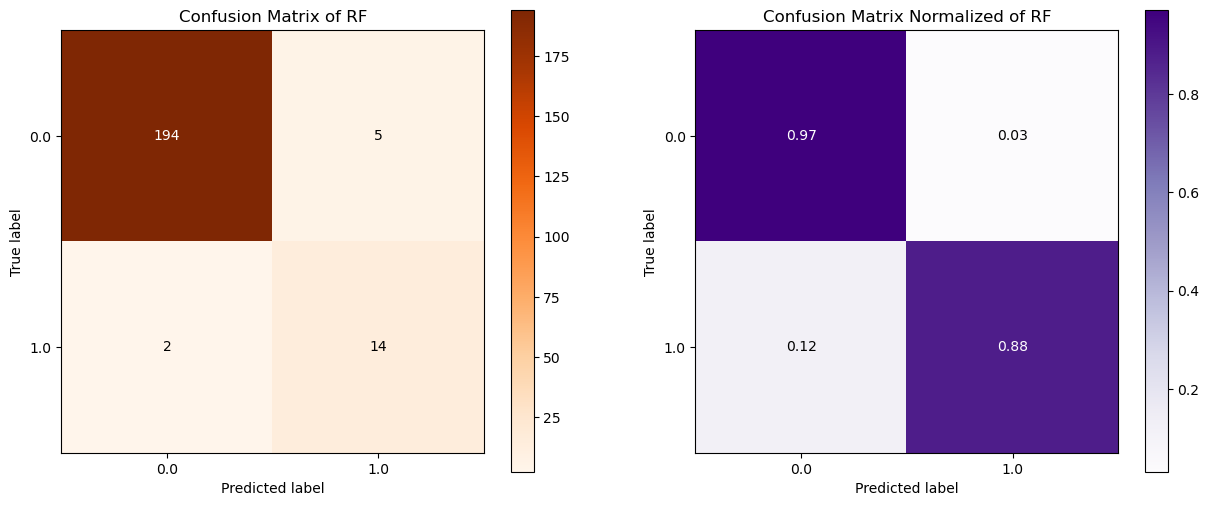

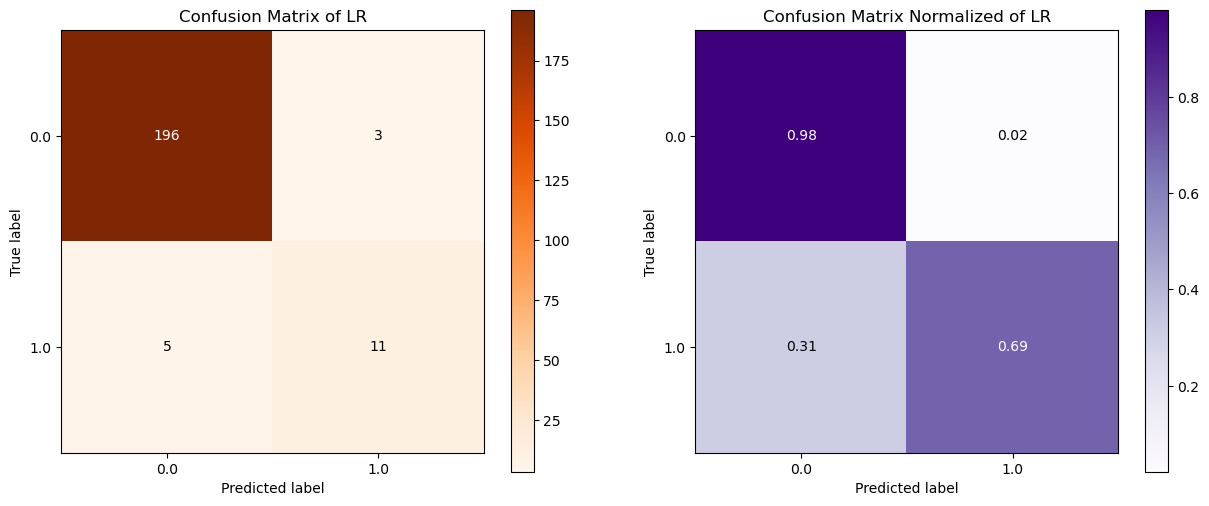

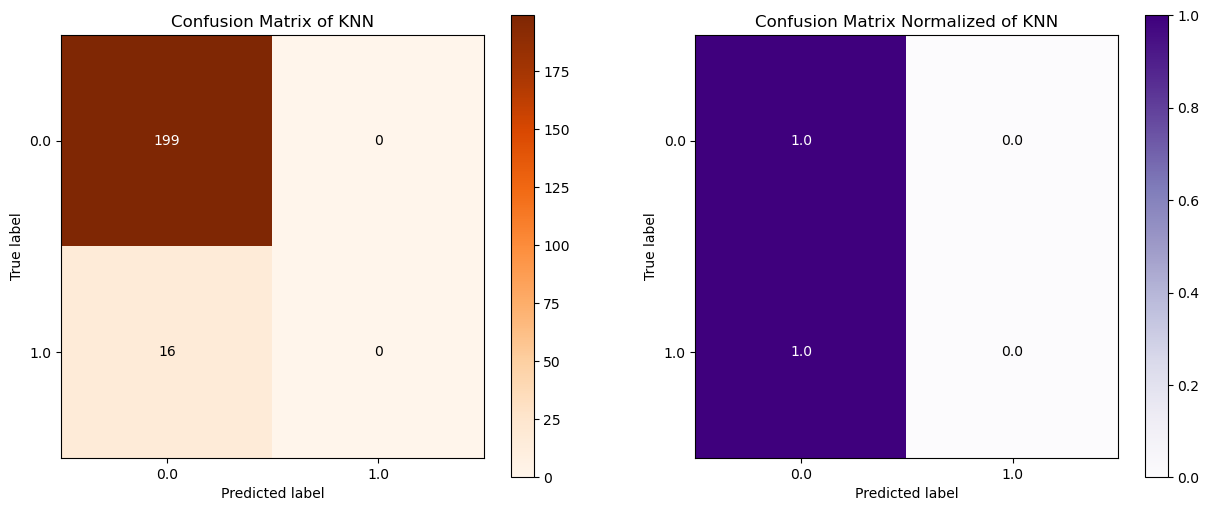

In [231]:
for name, model in models:
  if (name=="KNN(27)"):
    Y_test_pred = model.predict(x_test1)
  else:
    Y_test_pred = model.predict(x_test)

  fig = plt.figure(figsize=(15,6))
  ax1 = fig.add_subplot(121)
  skplt.metrics.plot_confusion_matrix(y_test, Y_test_pred, title="Confusion Matrix of "+name, cmap="Oranges", ax=ax1)

  ax2 = fig.add_subplot(122)
  skplt.metrics.plot_confusion_matrix(y_test, Y_test_pred, normalize=True, title="Confusion Matrix Normalized of "+name, cmap="Purples", ax=ax2)

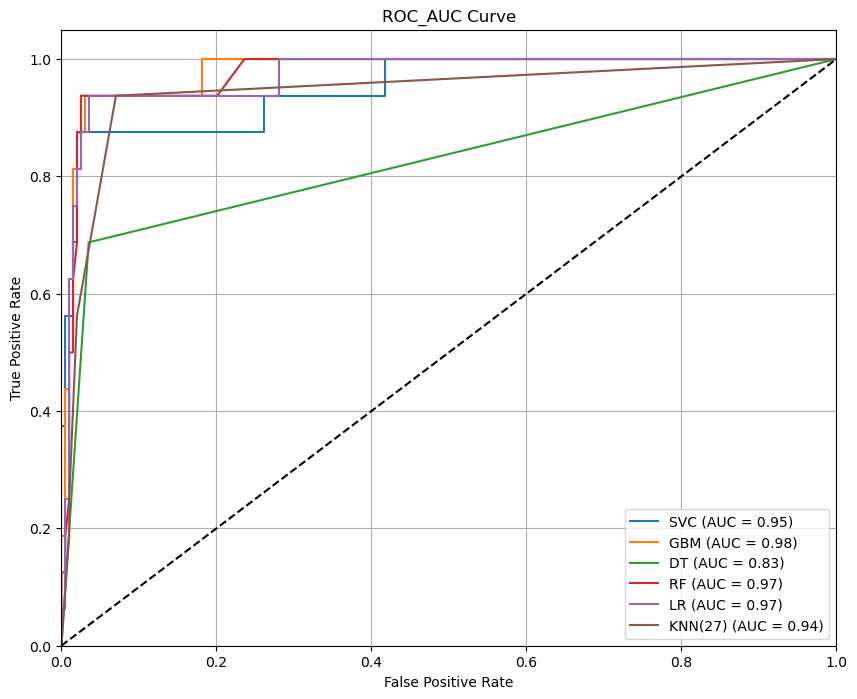

In [232]:
import matplotlib.pyplot as plt
import scikitplot as skplt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC  
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc


models = []
models.append(('SVC', SVC(probability=True, random_state=1).fit(x_train, y_train)))  
models.append(('GBM', GradientBoostingClassifier(random_state=1).fit(x_train, y_train)))
models.append(('DT', DecisionTreeClassifier().fit(x_train, y_train)))
models.append(('RF', RandomForestClassifier().fit(x_train, y_train)))
models.append(('LR', LogisticRegression(random_state=1).fit(x_train, y_train)))
models.append(('KNN(27)', KNeighborsClassifier().fit(x_train1, y_train)))


plt.figure(figsize=(10, 8))


for name, model in models:
    # Get the probabilities for ROC curve
    if name == "KNN(27)":
        Y_test_probs = model.predict_proba(x_test1)[:, 1]  
    else:
        Y_test_probs = model.predict_proba(x_test)[:, 1]  

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, Y_test_probs)
    roc_auc = auc(fpr, tpr)  # Calculate AUC

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')


plt.plot([0, 1], [0, 1], 'k--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_AUC Curve')
plt.legend(loc="lower right")
plt.grid()

# Show the plot
plt.show()

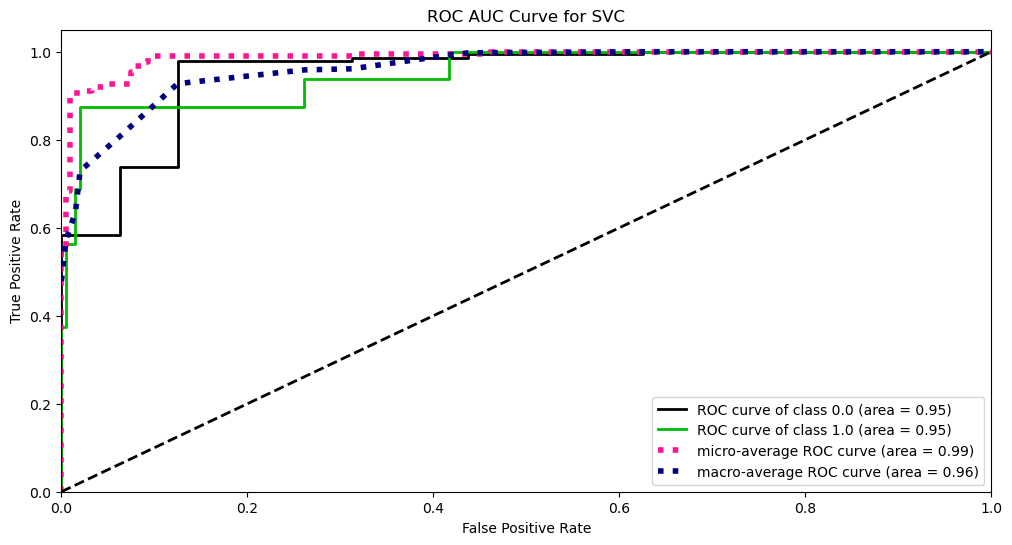

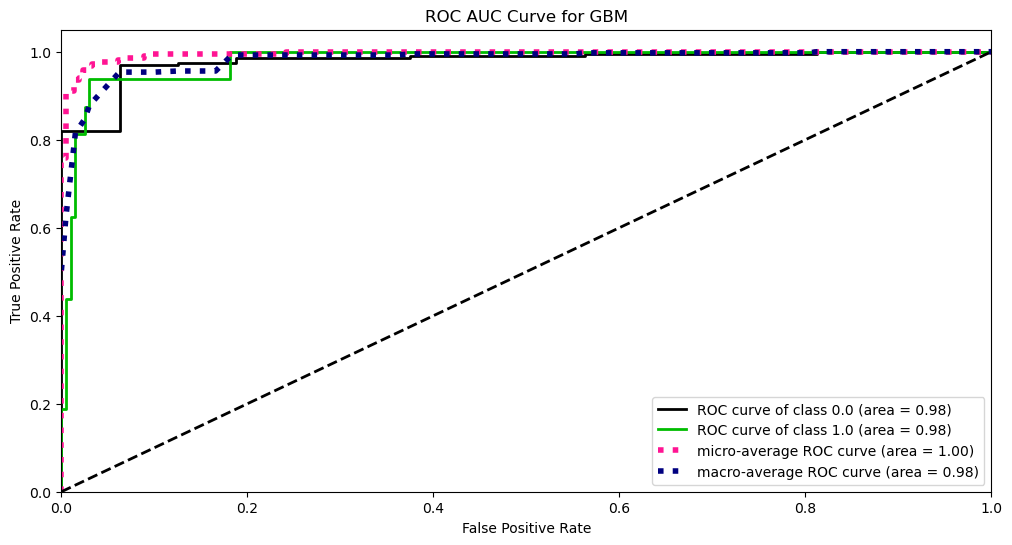

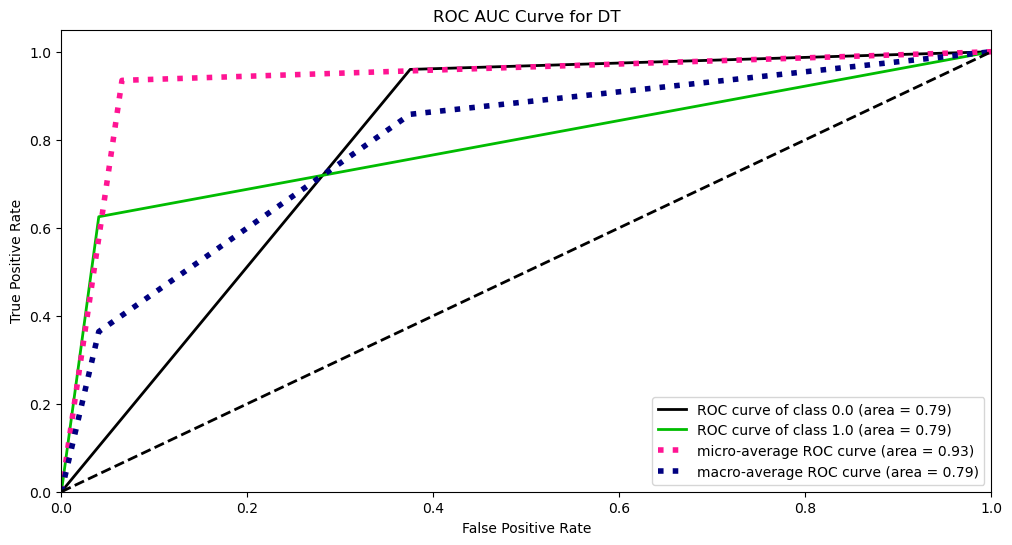

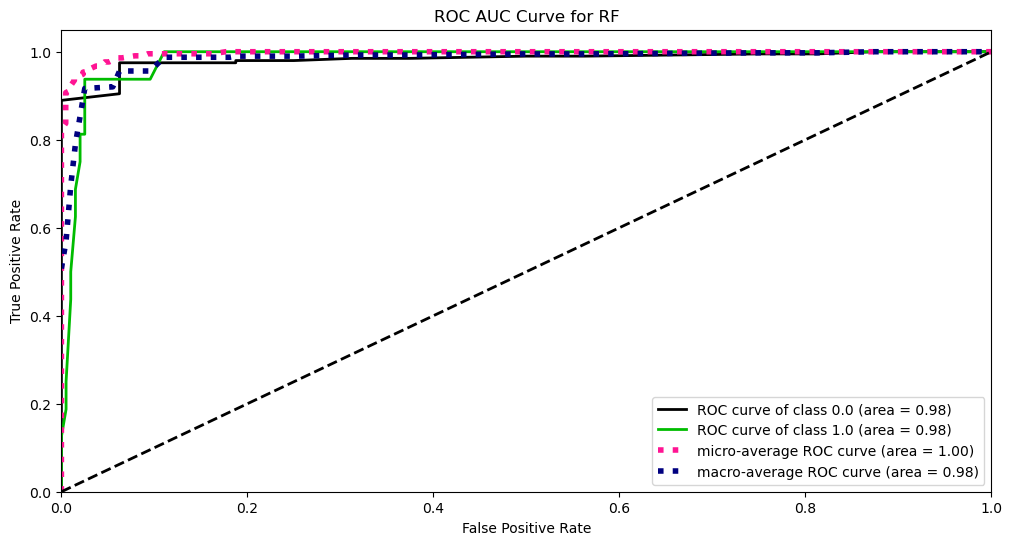

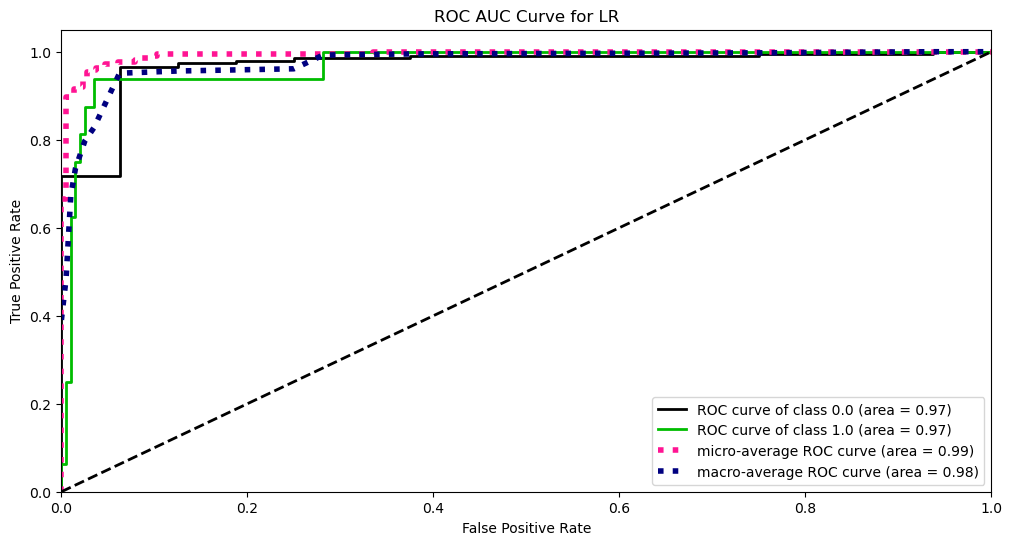

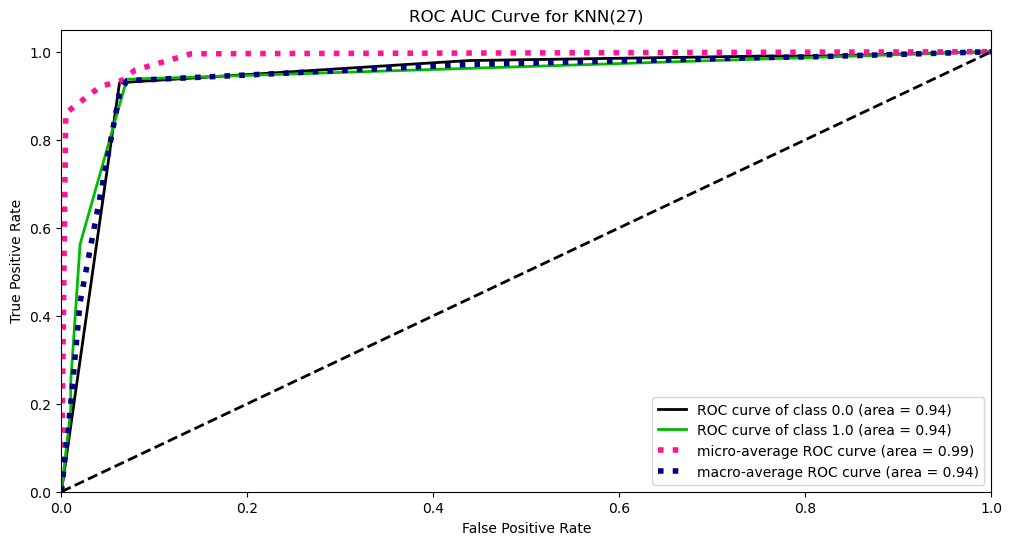

In [233]:

import matplotlib.pyplot as plt
import scikitplot as skplt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


models = []
models.append(('SVC', SVC(probability=True, random_state=1).fit(x_train, y_train)))  
models.append(('GBM', GradientBoostingClassifier(random_state=1).fit(x_train, y_train)))
models.append(('DT', DecisionTreeClassifier().fit(x_train, y_train)))
models.append(('RF', RandomForestClassifier().fit(x_train, y_train)))
models.append(('LR', LogisticRegression(random_state=1).fit(x_train, y_train)))
models.append(('KNN(27)', KNeighborsClassifier().fit(x_train1, y_train)))


for name, model in models:
    # Get the probabilities for ROC curve
    if name == "KNN(27)":
        Y_test_probs = model.predict_proba(x_test1)
    else:
        Y_test_probs = model.predict_proba(x_test)  

    
    skplt.metrics.plot_roc_curve(y_test, Y_test_probs, title="ROC AUC Curve for " + name, figsize=(12, 6))

plt.show()


Model Accuracy: 0.967


<Figure size 1000x600 with 0 Axes>

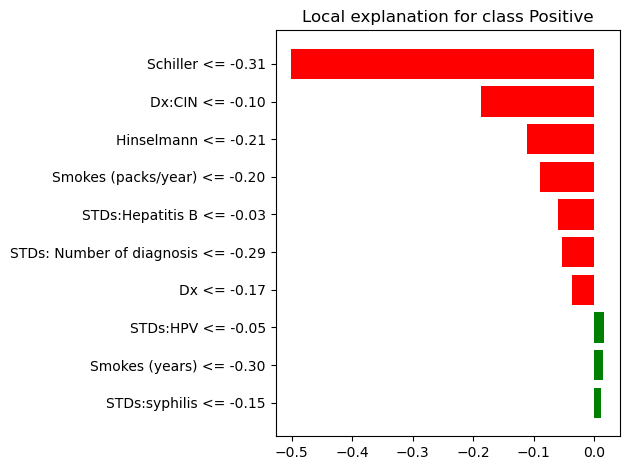

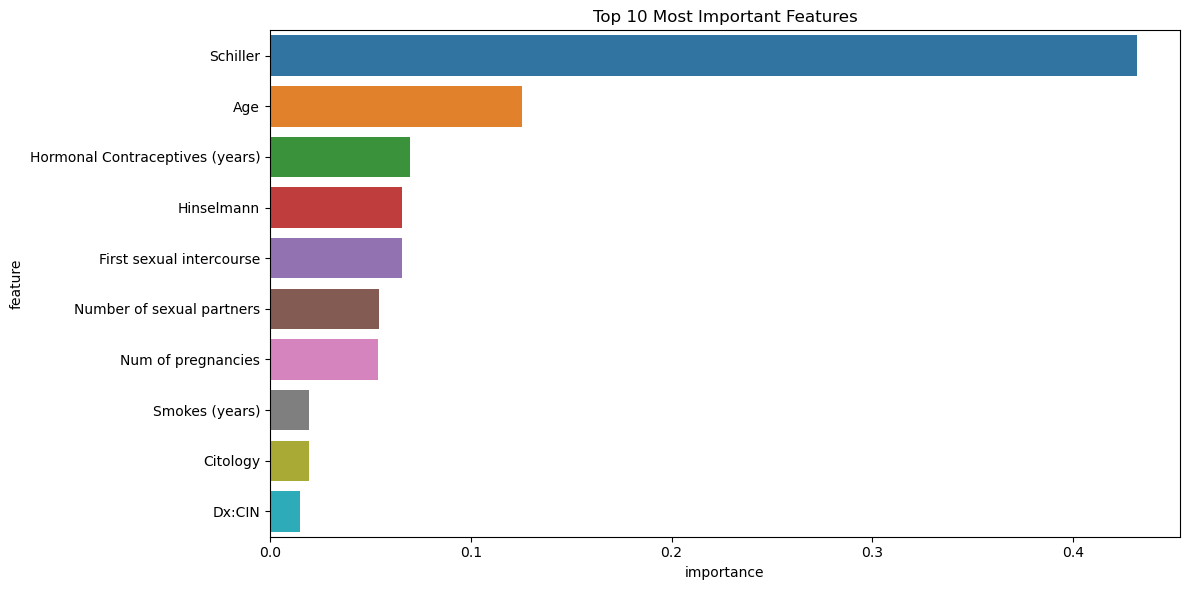

In [234]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('clean_cervical.csv')
df = df.astype('float64')


X = df.drop('Biopsy', axis=1)
y = df['Biopsy']

SS = StandardScaler()
X_scaled = pd.DataFrame(SS.fit_transform(X), columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)

rf_model = RandomForestClassifier(n_estimators=90, max_features=21, criterion='gini', random_state=1)
rf_model.fit(X_train, y_train)


explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train.values,
    feature_names=X_train.columns,
    class_names=['Negative', 'Positive'],
    mode='classification'
)


exp = explainer.explain_instance(
    X_test.iloc[0].values, 
    rf_model.predict_proba,
    num_features=10
)

# Plot LIME explanation
plt.figure(figsize=(10, 6))
exp.as_pyplot_figure()
plt.tight_layout()
plt.savefig('lime_explanation.png')

# Feature importance visualization
feature_imp = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_imp.head(10))
plt.title('Top 10 Most Important Features')
plt.tight_layout()
plt.savefig('feature_importance.png')

# Print model performance
print(f"Model Accuracy: {rf_model.score(X_test, y_test):.3f}")

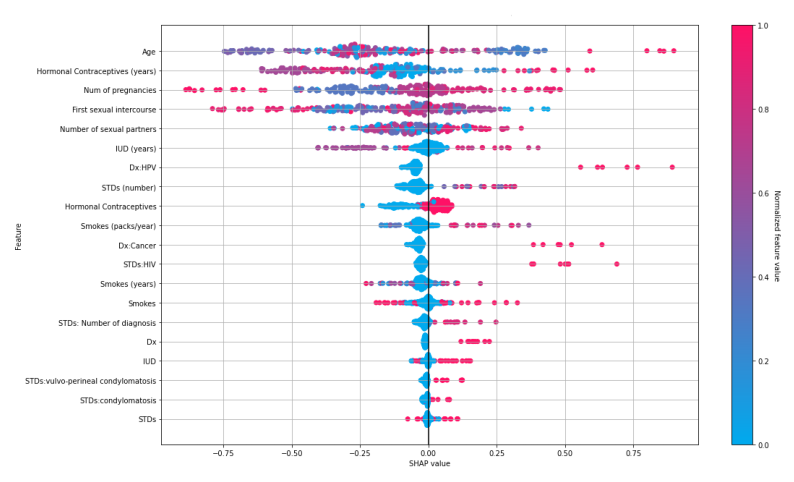

In [235]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import shap
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


df = pd.read_csv('clean_cervical.csv')
image = mpimg.imread('shap_summaryplot.png')
df = df.astype('float64')

X = df.drop('Biopsy', axis=1)
y = df['Biopsy']


SS = StandardScaler()
X_scaled = pd.DataFrame(SS.fit_transform(X), columns=X.columns)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)
rf_model = RandomForestClassifier(n_estimators=90, max_features=21, criterion='gini', random_state=1)
rf_model.fit(X_train, y_train)

explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)


if isinstance(shap_values, list):
    shap_values = shap_values[1]

plt.figure(figsize=(10, 8))
shap.summary_plot(
    shap_values,
    X_test,
    plot_type="dot",
    max_display=20,  
    title="SHAP Feature Importance",
    show=False,
    color_bar_label='Feature value'
)

plt.gcf().set_size_inches(12, 8)
plt.tight_layout()
plt.savefig('shap_summary_plot.png', bbox_inches='tight', dpi=300)
plt.close()
plt.imshow(image)
plt.axis('off')  
plt.show()


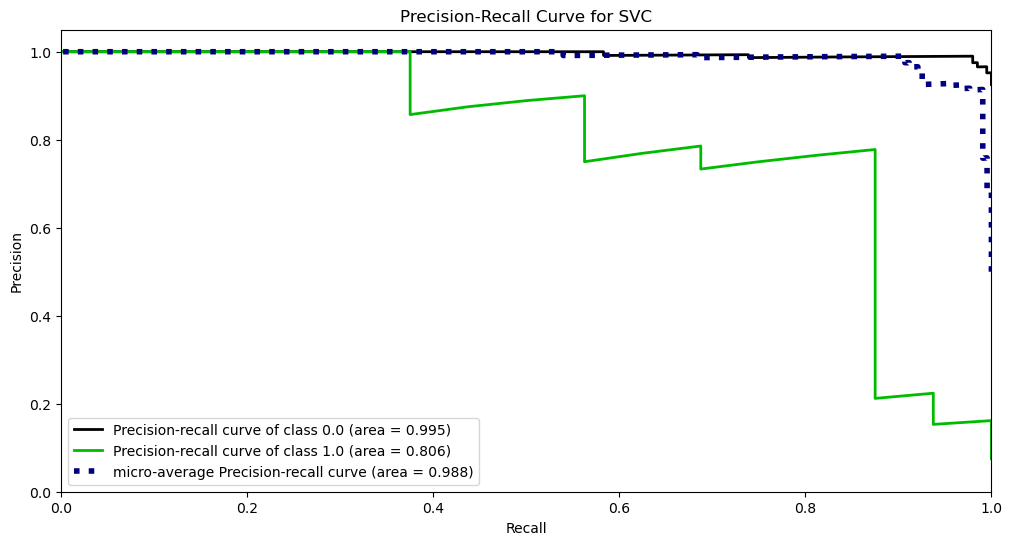

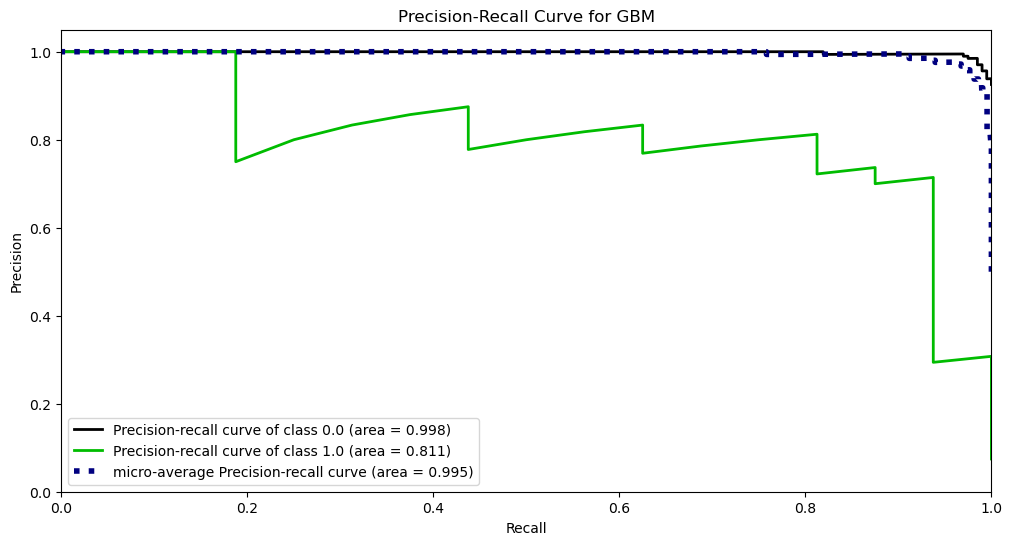

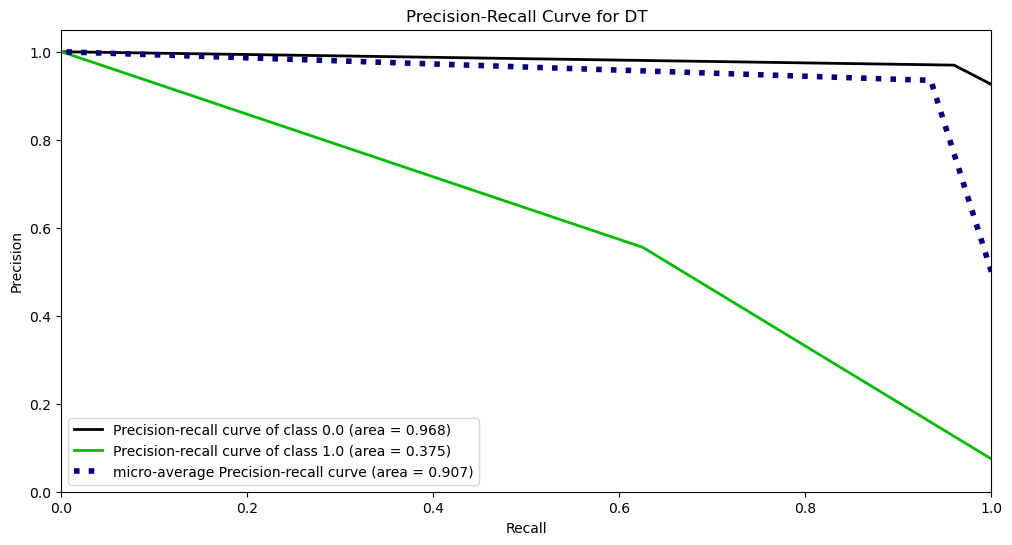

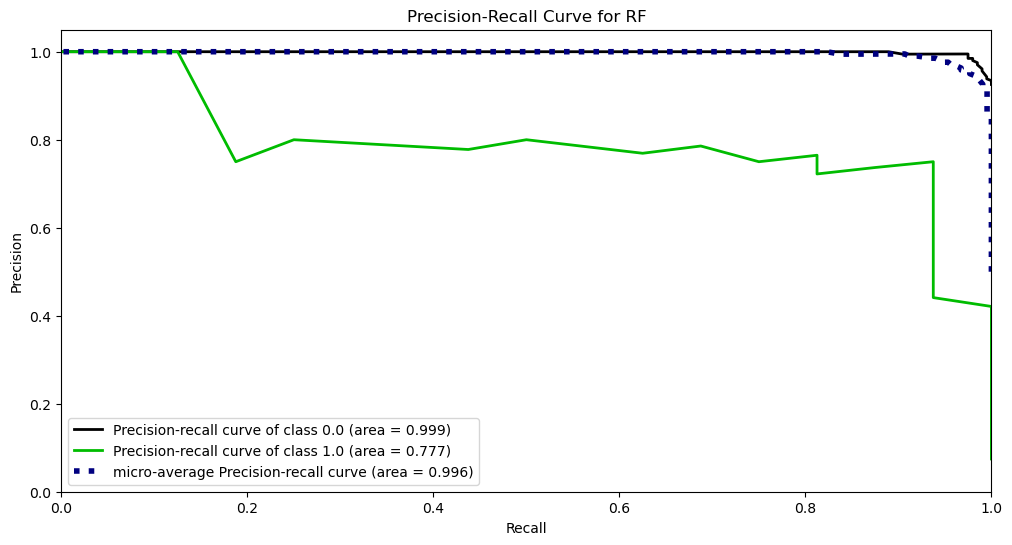

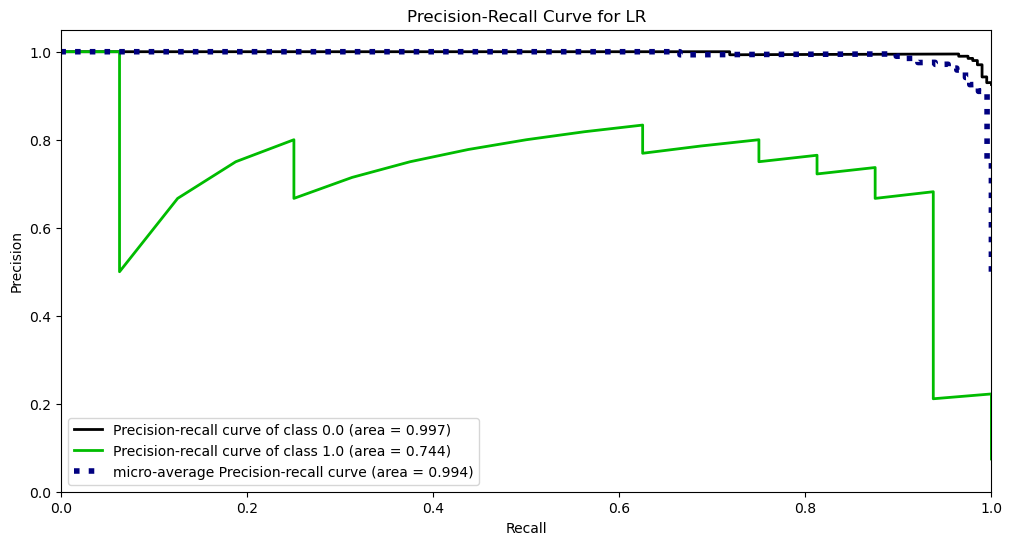

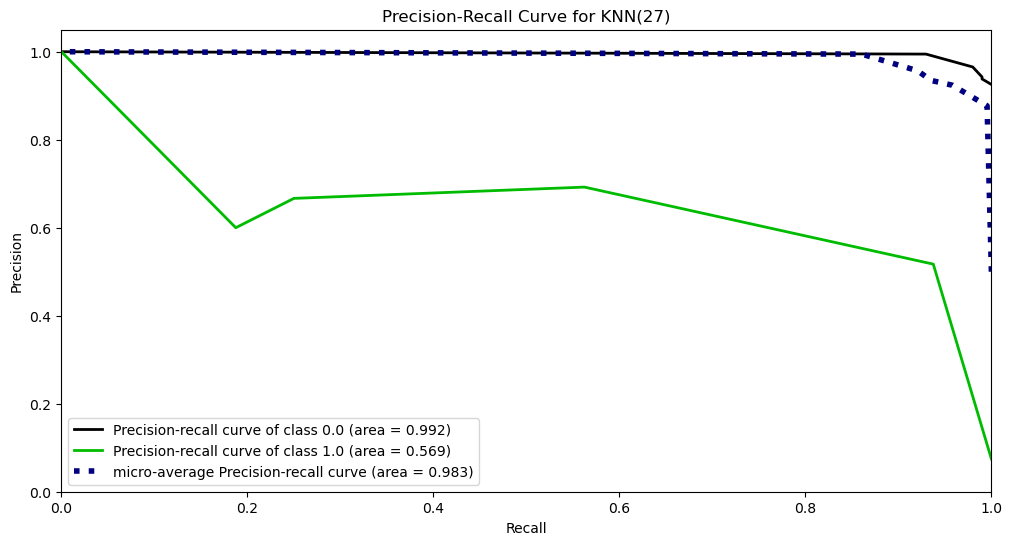

In [236]:

for name, model in models:
  if (name=="KNN(27)"):
    Y_test_probs = model.predict_proba(x_test1)
  else:
    Y_test_probs = model.predict_proba(x_test)

  skplt.metrics.plot_precision_recall_curve(y_test, Y_test_probs, title="Precision-Recall Curve for "+name, figsize=(12,6));

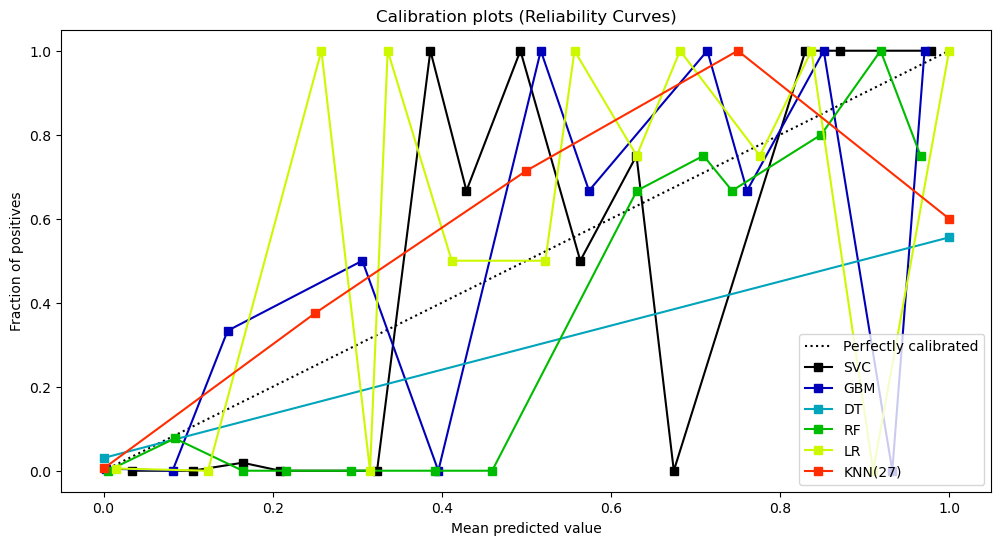

In [237]:

probas_list = []
clf_names = []
for name, model in models:
  if (name=="KNN(27)"):
    Y_test_probs = model.predict_proba(x_test1)
  else:
    Y_test_probs = model.predict_proba(x_test)
  probas_list.append(Y_test_probs)
  clf_names.append(name)

skplt.metrics.plot_calibration_curve(y_test, probas_list, clf_names, n_bins=15, figsize=(12,6));

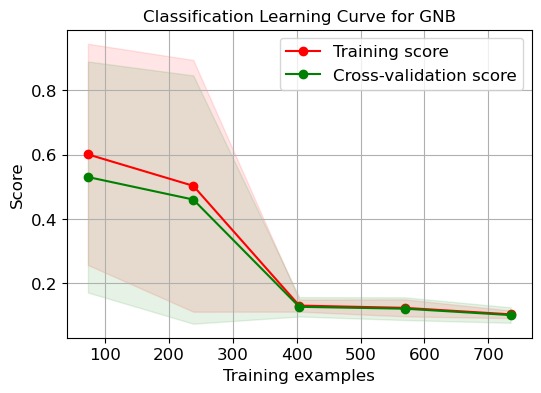

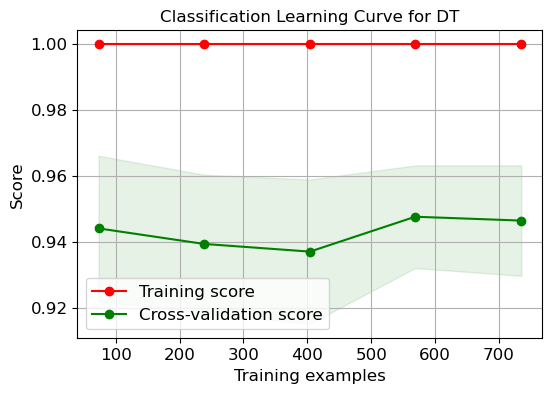

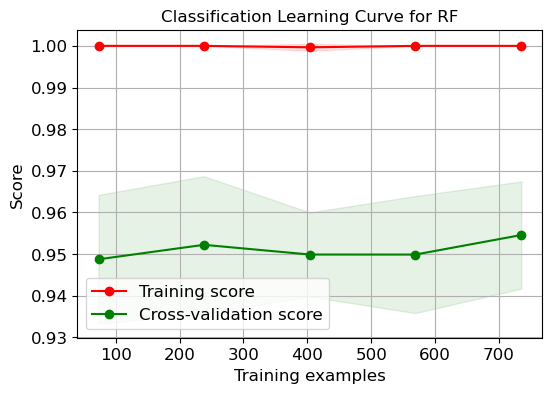

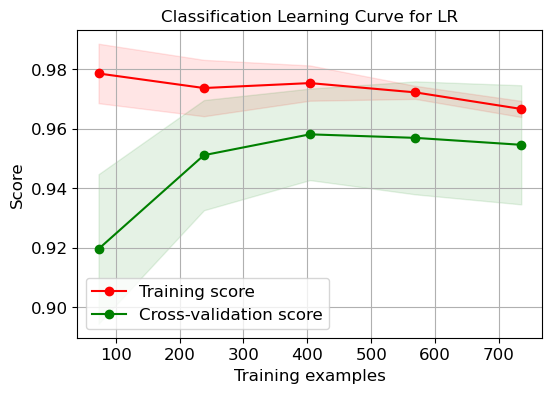

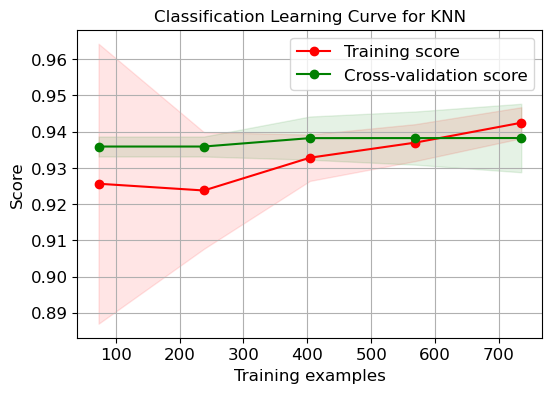

In [240]:

LR = LogisticRegression(random_state=1)
DT = DecisionTreeClassifier()
RF = RandomForestClassifier()
GNB = GaussianNB()
knn = KNeighborsClassifier(n_neighbors=27)

mod = []
mod.append(('GNB', GNB))
mod.append(('DT', DT))
mod.append(('RF', RF))
mod.append(('LR', LR))


for n , m in mod:
  skplt.estimators.plot_learning_curve(m, x, y,
                                     cv=7, shuffle=True, scoring="accuracy",
                                     n_jobs=-1, figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                     title="Classification Learning Curve for "+n);

skplt.estimators.plot_learning_curve(knn, df_scaled, y,
                                     cv=7, shuffle=True, scoring="accuracy",
                                     n_jobs=-1, figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                     title="Classification Learning Curve for KNN");

Feature: 0 Age, Score: -0.00923
Feature: 1 Number of sexual partners, Score: -0.01935
Feature: 2 First sexual intercourse, Score: -0.07825
Feature: 3 Num of pregnancies, Score: -0.08369
Feature: 4 Smokes, Score: -0.17723
Feature: 5 Smokes (years), Score: 0.02180
Feature: 6 Smokes (packs/year), Score: 0.00438
Feature: 7 Hormonal Contraceptives, Score: -0.16000
Feature: 8 Hormonal Contraceptives (years), Score: 0.06800
Feature: 9 IUD, Score: -0.01358
Feature: 10 IUD (years), Score: -0.00808
Feature: 11 STDs, Score: 1.01689
Feature: 12 STDs (number), Score: -0.03559
Feature: 13 STDs:condylomatosis, Score: 0.02590
Feature: 14 STDs:vaginal condylomatosis, Score: -0.07266
Feature: 15 STDs:vulvo-perineal condylomatosis, Score: 0.04909
Feature: 16 STDs:syphilis, Score: -1.13015
Feature: 17 STDs:molluscum contagiosum, Score: -0.01623
Feature: 18 STDs:HIV, Score: 0.24929
Feature: 19 STDs:Hepatitis B, Score: -0.03228
Feature: 20 STDs:HPV, Score: -0.09442
Feature: 21 STDs: Number of diagnosis, Sco

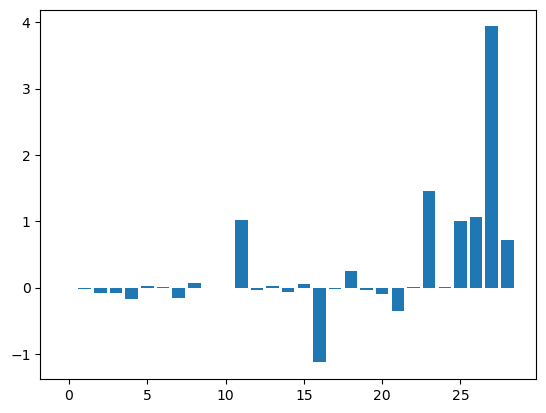

In [241]:
from matplotlib import pyplot


LR.fit(x, y)
importance = LR.coef_[0]

for i,v in enumerate(importance):
	print('Feature: %0d %s, Score: %.5f' % (i,x.columns[i],v))

pyplot.bar([z for z in range(len(importance))], importance)
pyplot.show()


Optimal number of features : 14


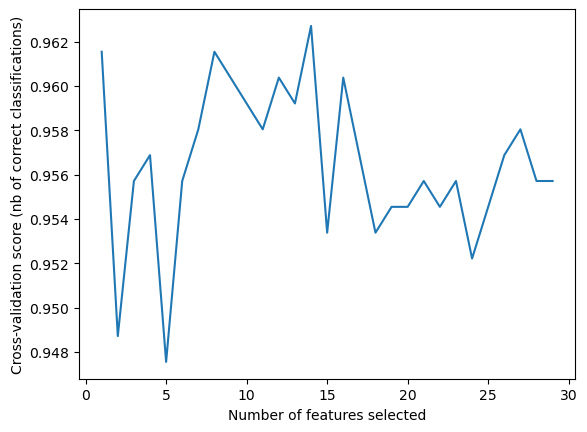

In [242]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification


min_features_to_select = 1  
rfecv = RFECV(estimator=RF, step=1, cv=StratifiedKFold(2),
              scoring='accuracy',
              min_features_to_select=min_features_to_select)
rfecv.fit(x, y)

print("Optimal number of features : %d" % rfecv.n_features_)

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (nb of correct classifications)")
plt.plot(range(min_features_to_select,
               len(rfecv.cv_results_['mean_test_score']) + min_features_to_select),
         rfecv.cv_results_['mean_test_score'])
plt.show()


In [265]:

model_mapping = {name: model for name, model in models}


best_model = model_mapping[best_model_name]


cervical_for_prediction = cervical.drop('Cervical_Cancer_Prediction', axis=1, errors='ignore')  


final_predictions = best_model.predict(cervical_for_prediction.drop('Biopsy', axis=1))

cervical['Cervical_Cancer_Prediction'] = final_predictions


cervical['Cervical_Cancer_Prediction'] = cervical['Cervical_Cancer_Prediction'].map({0: 'Absent', 1: 'Present'})


cervical.to_csv('final_prediction.csv', index=False)

print("Predictions saved to 'final_prediction.csv'.")


Predictions saved to 'final_prediction.csv'.


In [266]:
final = pd.read_csv('final_prediction.csv')
final.head(10)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy,Cervical_Cancer_Prediction
0,18,4.0,15.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,Absent
1,15,1.0,14.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,Absent
2,34,1.0,15.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,Absent
3,52,5.0,16.0,4.0,1.0,37.000000,37.0,1.0,3.0,0.0,...,0,1,0,1,0,0,0,0,0,Absent
4,46,3.0,21.0,4.0,0.0,0.000000,0.0,1.0,15.0,0.0,...,0,0,0,0,0,0,0,0,0,Absent
5,42,3.0,23.0,2.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,Absent
6,51,3.0,17.0,6.0,1.0,34.000000,3.4,0.0,0.0,1.0,...,0,0,0,0,0,1,1,0,1,Present
7,26,1.0,26.0,3.0,0.0,0.000000,0.0,1.0,2.0,1.0,...,0,0,0,0,0,0,0,0,0,Absent
8,45,1.0,20.0,5.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0,1,0,1,1,0,0,0,0,Absent
9,44,3.0,15.0,1.0,1.0,1.266973,2.8,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,Absent


In [267]:
import pandas as pd

final_predictions = pd.read_csv('final_prediction.csv')


cervical_cancer_counts = final_predictions['Cervical_Cancer_Prediction'].value_counts()

print("Summary of Cervical Cancer Predictions:")
print(f"- Number of people predicted to have cervical cancer: {cervical_cancer_counts.get('Present', 0)}")
print(f"- Number of people predicted to not have cervical cancer: {cervical_cancer_counts.get('Absent', 0)}")

Summary of Cervical Cancer Predictions:
- Number of people predicted to have cervical cancer: 65
- Number of people predicted to not have cervical cancer: 793
